# <font color='blue'>DAY 1</font>
## Handling missing values

### Take a first look at the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
nfl_data = pd.read_csv("NFL Play by Play 2009-2017 (v4).csv", low_memory=False)
sf_permits = pd.read_csv("Building_Permits.csv", low_memory=False)

In [3]:
# set seed for reproducibility
np.random.seed(0)

In [4]:
# look at a few rows of the nfl_data file. I can see a handful of missing data already!
nfl_data.sample(5)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
244485,2014-10-26,2014102607,18,3,1.0,00:39,1,939.0,12.0,TB,...,1.240299,0.225647,0.774353,0.245582,0.754418,0.225647,0.019935,-0.018156,0.038091,2014
115340,2011-11-20,2011112000,22,4,1.0,06:47,7,407.0,44.0,OAK,...,NaN,0.056036,0.943964,0.042963,0.957037,0.943964,0.013073,NaN,NaN,2011
68357,2010-11-14,2010111401,8,2,NaN,00:23,1,1823.0,0.0,CLE,...,NaN,0.365307,0.634693,0.384697,0.615303,0.634693,-0.019390,NaN,NaN,2010
368377,2017-09-24,2017092405,24,4,1.0,08:48,9,528.0,8.0,CLE,...,1.075660,0.935995,0.064005,0.921231,0.078769,0.064005,0.014764,0.003866,0.010899,2017
384684,2017-11-05,2017110505,11,2,1.0,09:15,10,2355.0,0.0,DEN,...,NaN,0.928474,0.071526,0.934641,0.065359,0.071526,-0.006166,NaN,NaN,2017


In [5]:
# your turn! Look at a couple of rows from the sf_permits dataset. Do you notice any missing data?

sf_permits.sample(2)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
78651,201503120624,8,otc alterations permit,03/12/2015,4273,029,2986,NaN,26th,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,9.0,Mission,94110.0,"(37.74972976527956, -122.40963202424835)",1374057173006
177779,201707071220,8,otc alterations permit,07/07/2017,0453,004A,950,NaN,Bay,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,2.0,Russian Hill,94109.0,"(37.80472551510833, -122.42280760820965)",1469546420378


### See how many missing data points we have

In [6]:
# get the number of missing data points per column
missing_values_count = nfl_data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

In [7]:
# how many total missing values do we have?
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

24.87214126835169

In [8]:
# your turn! Find out what percent of the sf_permits dataset is missing

missing_values_count_sf = sf_permits.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count_sf[0:10]

Permit Number                  0
Permit Type                    0
Permit Type Definition         0
Permit Creation Date           0
Block                          0
Lot                            0
Street Number                  0
Street Number Suffix      196684
Street Name                    0
Street Suffix               2768
dtype: int64

In [9]:
# how many total missing values do we have?
total_cells_sf = np.product(sf_permits.shape)
total_missing_sf = missing_values_count_sf.sum()

# percent of data that is missing
(total_missing_sf/total_cells_sf) * 100

26.26002315058403

### Figure out why the data is missing

In [10]:
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

#### Your turn!
* Look at the columns `Street Number Suffix` and `Zipcode` from the sf_permits datasets. Both of these contain missing values. Which, if either, of these are missing because they don't exist? Which, if either, are missing because they weren't recorded?

In [11]:
sf_permits.shape

(198900, 43)

In [12]:
missing_values_count_sf[0:15]

Permit Number                  0
Permit Type                    0
Permit Type Definition         0
Permit Creation Date           0
Block                          0
Lot                            0
Street Number                  0
Street Number Suffix      196684
Street Name                    0
Street Suffix               2768
Unit                      169421
Unit Suffix               196939
Description                  290
Current Status                 0
Current Status Date            0
dtype: int64

In [13]:
sf_permits.head(10)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,NaN,Indiana,St,...,1.0,constr type 1,1.0,constr type 1,NaN,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,NaN,11th,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,NaN,Alpine,Tr,...,NaN,NaN,NaN,NaN,NaN,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",146932394171


In [14]:
from dfply import *

In [15]:
(sf_permits >>
 select('Street Number Suffix', 'Zipcode') >>
 head(8))

,Street Number Suffix,Zipcode
0,NaN,94102.0
1,NaN,94102.0
2,NaN,94109.0
3,NaN,94109.0
4,NaN,94102.0
5,NaN,94107.0
6,NaN,94122.0
7,NaN,94124.0


En el caso de `Street Number Suffix` parece ser un caso de no existencia, pero en el caso de `Zipcode` es un dato que definitivamente debería existir y por lo tanto es que no se hizo su captura.

### Drop missing values

In [16]:
# remove all columns with at least one missing value
columns_with_na_dropped = nfl_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [17]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % nfl_data.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 102 

Columns with na's dropped: 41


In [18]:
# Your turn! Try removing all the rows from the sf_permits dataset that contain missing values. How many are left?

sf_permits.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


In [19]:
# Now try removing all the columns with empty values. Now how much of your data is left?
columns_with_na_dropped_sf = sf_permits.dropna(axis=1)
columns_with_na_dropped_sf.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


In [20]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % sf_permits.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped_sf.shape[1])

Columns in original dataset: 43 

Columns with na's dropped: 12


### Filling in missing values automatically

In [21]:
# get a small subset of the NFL dataset
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [22]:
# replace all NA's with 0
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [23]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the reamining na's with 0
subset_nfl_data.fillna(method = 'bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [24]:
# Your turn! Try replacing all the NaN's in the sf_permits data with the one that
# comes directly after it and then replacing any remaining NaN's with 0

sf_permits.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [25]:
sf_permits = sf_permits.fillna(method = 'bfill', axis=0).fillna(0)

sf_permits.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,A,Ellis,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,A,Geary,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,A,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,A,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,A,Market,St,...,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [26]:
sf_permits = sf_permits.fillna(0)
sf_permits.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,A,Ellis,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,A,Geary,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,A,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,A,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,A,Market,St,...,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


# <font color='blue'>DAY 2</font>
## Scaling and normalization

In [27]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

### Scaling

Text(0.5, 1.0, 'Scaled data')

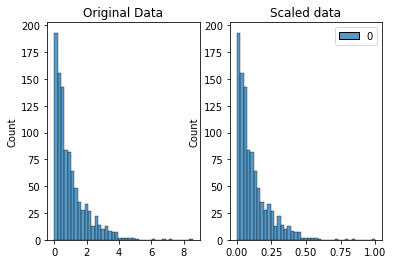

In [28]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.histplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

### Normalization

Text(0.5, 1.0, 'Normalized data')

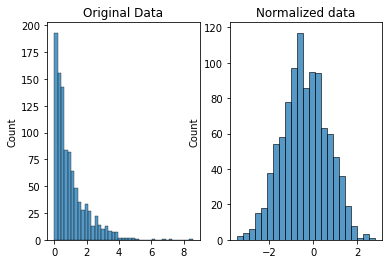

In [29]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.histplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

### Your turn!
For the following example, decide whether scaling or normalization makes more sense.

* You want to build a linear regression model to predict someone's grades given how much time they spend on various activities during a normal school week. You notice that your measurements for how much time students spend studying aren't normally distributed: some students spend almost no time studying and others study for four or more hours every day. Should you scale or normalize this variable?
* You're still working on your grades study, but you want to include information on how students perform on several fitness tests as well. You have information on how many jumping jacks and push-ups each student can complete in a minute. However, you notice that students perform far more jumping jacks than push-ups: the average for the former is 40, and for the latter only 10. Should you scale or normalize these variables?

**ANSWER:** In the first case scaling would be more useful, while on the second situation normalization would be the best way to go.

In [30]:
kickstarters_2017.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Practice scaling

In [31]:
# scale the goals from 0 to 1
scaled_data = minmax_scaling(kickstarters_2017.usd_goal_real, columns = [0])

c:\users\brend\anaconda3\envs\program\lib\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


Text(0.5, 1.0, 'Scaled data')

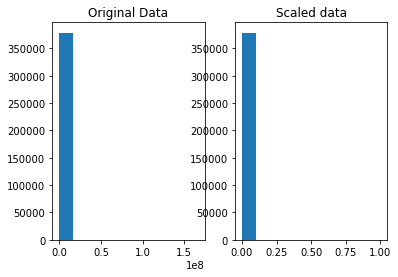

In [32]:
# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
ax[0].hist(kickstarters_2017.usd_goal_real)
ax[0].set_title("Original Data")
ax[1].hist(scaled_data)
ax[1].set_title("Scaled data")

In [33]:
# Your turn!
# We just scaled the "usd_goal_real" column. What about the "goal" column?

# scale the goals from 0 to 1
scaled_data1 = minmax_scaling(kickstarters_2017.goal, columns = [0])

Text(0.5, 1.0, 'Scaled data')

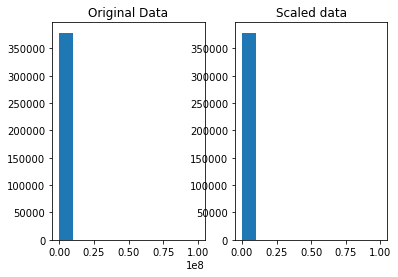

In [34]:
# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
ax[0].hist(kickstarters_2017.goal)
ax[0].set_title("Original Data")
ax[1].hist(scaled_data1)
ax[1].set_title("Scaled data")

### Practice normalization

In [35]:
# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

Text(0.5, 1.0, 'Normalized data')

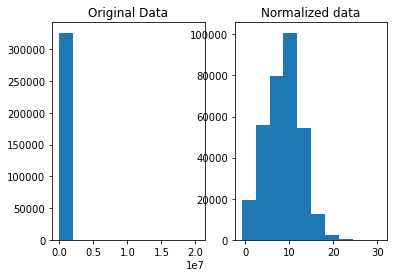

In [36]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
ax[0].hist(positive_pledges)
ax[0].set_title("Original Data")
ax[1].hist(normalized_pledges)
ax[1].set_title("Normalized data")

In [37]:
# Your turn!
# We looked as the usd_pledged_real column. What about the "pledged" column? Does it have the same info?

# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges1 = kickstarters_2017.pledged > 0

# get only positive pledges (using their indexes)
positive_pledges1 = kickstarters_2017.pledged.loc[index_of_positive_pledges1]

# normalize the pledges (w/ Box-Cox)
normalized_pledges1 = stats.boxcox(positive_pledges1)[0]

Text(0.5, 1.0, 'Normalized data')

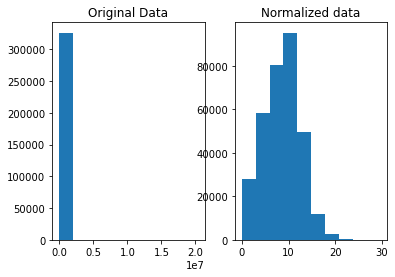

In [39]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
ax[0].hist(positive_pledges1)
ax[0].set_title("Original Data")
ax[1].hist(normalized_pledges1)
ax[1].set_title("Normalized data")

# <font color='blue'>DAY 3</font>
## Parsing dates

In [41]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("database.csv")
landslides = pd.read_csv("catalog.csv", encoding="iso-8859-1")
volcanos = pd.read_csv("vedatabase.csv", encoding="iso-8859-1")

# set seed for reproducibility
np.random.seed(0)

### Check the data type of our date column

In [42]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [43]:
# Your turn! Check the data type of the Date column in the earthquakes dataframe

print(earthquakes['Date'].head())

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object


### Convert our date columns to datetime

In [44]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

In [45]:
# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [46]:
# Your turn! Create a new column, date_parsed, in the earthquakes
# dataset that has correctly parsed dates in it. (Don't forget to 
# double-check that the dtype is correct!)

# create a new column, date_parsed, with the parsed dates
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format=True)

In [47]:
# print the first few rows
earthquakes['date_parsed'].head()

0    1965-01-02 00:00:00
1    1965-01-04 00:00:00
2    1965-01-05 00:00:00
3    1965-01-08 00:00:00
4    1965-01-09 00:00:00
Name: date_parsed, dtype: object

### Select just the day of the month from our column

In [48]:
# try to get the day of the month from the date column
day_of_month_landslides = landslides['date'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

In [49]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day

In [50]:
# Your turn! get the day of the month from the date_parsed column
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

### Plot the day of the month to check the date parsing

<AxesSubplot:xlabel='date_parsed', ylabel='Count'>

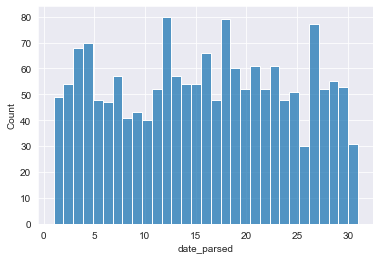

In [51]:
sns.set_style("darkgrid")
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.histplot(day_of_month_landslides, kde=False, bins=31)

In [52]:
# Your turn! Plot the days of the month from your
# earthquake dataset and make sure they make sense.

# remove na's
day_of_month_earthquakes = day_of_month_earthquakes.dropna()

# plot the day of the month
sns.histplot(day_of_month_earthquakes, kde=False, bins=31)

NameError: name 'day_of_month_earthquakes' is not defined

# <font color='blue'>DAY 4</font>
## Character encodings

In [53]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful character encoding module
import chardet

# set seed for reproducibility
np.random.seed(0)

### What are encodings?

In [54]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

In [55]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors = "replace")

# check the type
type(after)

bytes

In [56]:
# take a look at what the bytes look like
after

b'This is the euro symbol: \xe2\x82\xac'

In [57]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

In [58]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: ?


In [59]:
# Your turn! Try encoding and decoding different symbols to ASCII and
# see what happens. I'd recommend $, #, 你好 and नमस्ते but feel free to
# try other characters. What happens? When would this cause problems?

# Dollar symbol:

# start with a string
before1 = "This is the symbol: $"

# encode it to a different encoding, replacing characters that raise errors
after1 = before1.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after1.decode("ascii"))

This is the symbol: $


In [60]:
# Hash symbol:

# start with a string
before2 = "This is the symbol: #"

# encode it to a different encoding, replacing characters that raise errors
after2 = before2.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after2.decode("ascii"))

This is the symbol: #


In [61]:
# Weird letters symbol:

# start with a string
before3 = "This is the symbol: 你好"

# encode it to a different encoding, replacing characters that raise errors
after3 = before3.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after3.decode("ascii"))

This is the symbol: ??


In [62]:
# Weird letters symbol:

# start with a string
before4 = "This is the symbol: नमस्ते"

# encode it to a different encoding, replacing characters that raise errors
after4 = before4.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after4.decode("ascii"))

This is the symbol: ??????


In [63]:
before5 = "This is the symbol: ξ"

# encode it to a different encoding, replacing characters that raise errors
after5 = before5.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after5.decode("ascii"))

This is the symbol: ?


In [64]:
before6 = "This is the symbol: Ψ"

# encode it to a different encoding, replacing characters that raise errors
after6 = before6.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after6.decode("ascii"))

This is the symbol: ?


### Reading in files with encoding problems

In [88]:
# try to read in a file not in UTF-8
kickstarter_2016 = pd.read_csv("ks-projects-201612.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 11: invalid start byte

In [89]:
# look at the first ten thousand bytes to guess the character encoding
with open("ks-projects-201801.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [90]:
# read in the file with the encoding detected by chardet
kickstarter_2016 = pd.read_csv("ks-projects-201612.csv", encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()

c:\users\brend\anaconda3\envs\program\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [68]:
# Your Turn! Trying to read in this file gives you an error. Figure out
# what the correct encoding should be and read in the file. :)
police_killings = pd.read_csv("PoliceKillingsUS.csv", encoding = 'Windows-1252')
police_killings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### Saving your files with UTF-8 encoding

In [72]:
# save our file (will be saved as UTF-8 by default!)
kickstarter_2016.to_csv("ks-projects-201801-utf8.csv")

In [70]:
# Your turn! Save out a version of the police_killings dataset with UTF-8 encoding
police_killings.to_csv("police_killings-utf8.csv")

# <font color='blue'>DAY 5</font>
## Inconsistent data entry

In [73]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

# set seed for reproducibility
np.random.seed(0)

In [74]:
with open("PakistanSuicideAttacks Ver 11 (30-November-2017).csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [75]:
# read in our dat
suicide_attacks = pd.read_csv("PakistanSuicideAttacks Ver 11 (30-November-2017).csv", 
                              encoding='Windows-1252')

### Do some preliminary text pre-processing

In [76]:
# get all the unique values in the 'City' column
cities = suicide_attacks['City'].unique()

# sort them alphabetically and then take a closer look
cities.sort()
cities

array(['ATTOCK', 'Attock ', 'Bajaur Agency', 'Bannu', 'Bhakkar ', 'Buner',
       'Chakwal ', 'Chaman', 'Charsadda', 'Charsadda ', 'D. I Khan',
       'D.G Khan', 'D.G Khan ', 'D.I Khan', 'D.I Khan ', 'Dara Adam Khel',
       'Dara Adam khel', 'Fateh Jang', 'Ghallanai, Mohmand Agency ',
       'Gujrat', 'Hangu', 'Haripur', 'Hayatabad', 'Islamabad',
       'Islamabad ', 'Jacobabad', 'KURRAM AGENCY', 'Karachi', 'Karachi ',
       'Karak', 'Khanewal', 'Khuzdar', 'Khyber Agency', 'Khyber Agency ',
       'Kohat', 'Kohat ', 'Kuram Agency ', 'Lahore', 'Lahore ',
       'Lakki Marwat', 'Lakki marwat', 'Lasbela', 'Lower Dir', 'MULTAN',
       'Malakand ', 'Mansehra', 'Mardan', 'Mohmand Agency',
       'Mohmand Agency ', 'Mohmand agency', 'Mosal Kor, Mohmand Agency',
       'Multan', 'Muzaffarabad', 'North Waziristan', 'North waziristan',
       'Nowshehra', 'Orakzai Agency', 'Peshawar', 'Peshawar ', 'Pishin',
       'Poonch', 'Quetta', 'Quetta ', 'Rawalpindi', 'Sargodha',
       'Sehwan town',

In [77]:
# convert to lower case
suicide_attacks['City'] = suicide_attacks['City'].str.lower()
# remove trailing white spaces
suicide_attacks['City'] = suicide_attacks['City'].str.strip()

In [78]:
# Your turn! Take a look at all the unique values in the "Province" column. 
# Then convert the column to lowercase and remove any trailing white spaces

# get all the unique values in the 'City' column
provinces = suicide_attacks['Province'].unique()

# sort them alphabetically and then take a closer look
provinces.sort()
provinces

array(['AJK', 'Balochistan', 'Baluchistan', 'Capital', 'FATA', 'Fata',
       'KPK', 'Punjab', 'Sindh'], dtype=object)

In [79]:
# convert to lower case
suicide_attacks['Province'] = suicide_attacks['Province'].str.lower()
# remove trailing white spaces
suicide_attacks['Province'] = suicide_attacks['Province'].str.strip()

### Use fuzzy matching to correct inconsistent data entry

In [80]:
# get all the unique values in the 'City' column
cities = suicide_attacks['City'].unique()

# sort them alphabetically and then take a closer look
cities.sort()
cities

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd. i khan', 'd.g khan', 'd.i khan',
       'dara adam khel', 'fateh jang', 'ghallanai, mohmand agency',
       'gujrat', 'hangu', 'haripur', 'hayatabad', 'islamabad',
       'jacobabad', 'karachi', 'karak', 'khanewal', 'khuzdar',
       'khyber agency', 'kohat', 'kuram agency', 'kurram agency',
       'lahore', 'lakki marwat', 'lasbela', 'lower dir', 'malakand',
       'mansehra', 'mardan', 'mohmand agency',
       'mosal kor, mohmand agency', 'multan', 'muzaffarabad',
       'north waziristan', 'nowshehra', 'orakzai agency', 'peshawar',
       'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=

In [81]:
# get the top 10 closest matches to "d.i khan"
matches = fuzzywuzzy.process.extract("d.i khan", cities, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches

[('d. i khan', 100),
 ('d.i khan', 100),
 ('d.g khan', 88),
 ('khanewal', 50),
 ('sudhanoti', 47),
 ('hangu', 46),
 ('kohat', 46),
 ('dara adam khel', 45),
 ('chaman', 43),
 ('mardan', 43)]

In [82]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [83]:
# use the function we just wrote to replace close matches to "d.i khan" with "d.i khan"
replace_matches_in_column(df=suicide_attacks, column='City', string_to_match="d.i khan")

All done!


In [84]:
# get all the unique values in the 'City' column
cities = suicide_attacks['City'].unique()

# sort them alphabetically and then take a closer look
cities.sort()
cities

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd.g khan', 'd.i khan', 'dara adam khel',
       'fateh jang', 'ghallanai, mohmand agency', 'gujrat', 'hangu',
       'haripur', 'hayatabad', 'islamabad', 'jacobabad', 'karachi',
       'karak', 'khanewal', 'khuzdar', 'khyber agency', 'kohat',
       'kuram agency', 'kurram agency', 'lahore', 'lakki marwat',
       'lasbela', 'lower dir', 'malakand', 'mansehra', 'mardan',
       'mohmand agency', 'mosal kor, mohmand agency', 'multan',
       'muzaffarabad', 'north waziristan', 'nowshehra', 'orakzai agency',
       'peshawar', 'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=object)

In [85]:
# Your turn! It looks like 'kuram agency' and 'kurram agency' should
# be the same city. Correct the dataframe so that they are.

matches1 = fuzzywuzzy.process.extract("kuram agency", cities, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

# take a look at them
matches1

[('kuram agency', 100),
 ('kurram agency', 96),
 ('bajaur agency', 72),
 ('khyber agency', 72),
 ('orakzai agency', 69),
 ('mohmand agency', 62),
 ('mosal kor, mohmand agency', 61),
 ('ghallanai, mohmand agency', 50),
 ('gujrat', 44),
 ('d.g khan', 40)]

In [86]:
replace_matches_in_column(df=suicide_attacks, column='City', string_to_match="Kuram agency")

All done!


In [87]:
cities = suicide_attacks['City'].unique()
cities.sort()
cities

array(['Kuram agency', 'attock', 'bajaur agency', 'bannu', 'bhakkar',
       'buner', 'chakwal', 'chaman', 'charsadda', 'd.g khan', 'd.i khan',
       'dara adam khel', 'fateh jang', 'ghallanai, mohmand agency',
       'gujrat', 'hangu', 'haripur', 'hayatabad', 'islamabad',
       'jacobabad', 'karachi', 'karak', 'khanewal', 'khuzdar',
       'khyber agency', 'kohat', 'lahore', 'lakki marwat', 'lasbela',
       'lower dir', 'malakand', 'mansehra', 'mardan', 'mohmand agency',
       'mosal kor, mohmand agency', 'multan', 'muzaffarabad',
       'north waziristan', 'nowshehra', 'orakzai agency', 'peshawar',
       'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=object)